In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


amazon_sales= 'Amazon Sale Report.csv' 

sales=pd.read_csv(amazon_sales)
#sales = sales.drop(columns=['Unnamed: 22'])
    
#Drop both 'fulfilled-by' and 'Unnamed: 22' 
sales = sales.drop(columns=['fulfilled-by', 'Unnamed: 22'])


# Function to display initial data overview
def data_overview(df, name):
    print(f"\nOverview of {name} dataset:")
    print(df.info())
    print(df.head())
    print(f"\nNumber of duplicates in {name}: {df.duplicated().sum()}")
    print(f"Missing values in {name}:\n{df.isnull().sum()}\n")
    
    
# # Calculate the percentage of missing values
# # Round the percentages to two decimal places
# missing_percentages = sales.isnull().sum() / len(sales) *100
# missing_percentages = missing_percentages.round(2)
# print('Raw data missing values percentages')
# for column, percentage in missing_percentages.items():
#     if percentage > 0:
#         print(f"{column}: {percentage}%")
    
# Replace missing values in 'Courier Status' with 'Unknown' since 5.33% are null
sales['Courier Status'].fillna('Unknown', inplace=True)

# Replace missing values in 'currency' with 'INR' since 6.04% are null & all non-null are INR
sales['currency'].fillna('INR', inplace=True)

# Calculate the mean and median of the 'Amount' column 
amount_mean = sales['Amount'].mean()
amount_median = sales['Amount'].median()
# Replace missing values in 'Amount' with the mean since 6.04% are null
sales['Amount'].fillna(amount_mean, inplace=True)

# Replace missing values with 'Unknown'
columns_to_fill = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

for column in columns_to_fill:
    sales[column].fillna('Unknown', inplace=True)


# Replace NaN values in 'promotion-ids' with 'None'
sales['promotion-ids'] = sales['promotion-ids'].fillna('None')



# # Drop both 'fulfilled-by' and 'Unnamed: 22' 
# sales = sales.drop(columns=['fulfilled-by', 'Unnamed: 22'])
    
# missing_summary = sales.isnull().sum()
# print(missing_summary[missing_summary > 0])


    
    
    
# Display initial data overviews
data_overview(sales, "sales")



/Users/juanescobar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



Overview of sales dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  Amount

In [2]:
# Replace missing values in 'Courier Status' with 'Unknown' since 5.33% are null
sales['Courier Status'].fillna('Unknown', inplace=True)

# Replace missing values in 'currency' with 'INR' since 6.04% are null & all non-null are INR
sales['currency'].fillna('INR', inplace=True)

# Calculate the mean and median of the 'Amount' column 
amount_mean = sales['Amount'].mean()
amount_median = sales['Amount'].median()
# Replace missing values in 'Amount' with the mean since 6.04% are null
sales['Amount'].fillna(amount_mean, inplace=True)

# Replace missing values with 'Unknown'
columns_to_fill = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

for column in columns_to_fill:
    sales[column].fillna('Unknown', inplace=True)

# # Replace missing values with 'None'
# sales['promotion-ids'] = sales['promotion-ids'].fillna(value=None)

# # Drop both 'fulfilled-by' and 'Unnamed: 22' 
# sales = sales.drop(columns=['fulfilled-by', 'Unnamed: 22'])
    
# missing_summary = sales.isnull().sum()
# print(missing_summary[missing_summary > 0])




In [3]:
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')
sales['Fulfilment'] = sales['Fulfilment'].astype('category')
sales.columns = sales.columns.str.strip()

# List of columns to convert to 'category' type
columns_to_convert = ['Fulfilment', 'Sales Channel', 'ship-service-level']

# Convert the columns to 'category' type
sales[columns_to_convert] = sales[columns_to_convert].astype('category')


NameError: name 'outliers' is not defined

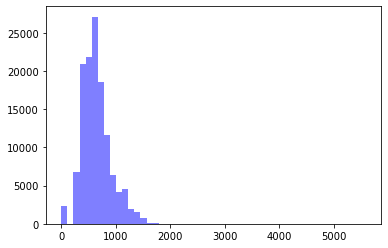

In [4]:
# Plot histogram of entire data
plt.hist(sales['Amount'], bins=50, color='blue', alpha=0.5, label='All Data')

# Plot histogram of outliers
plt.hist(outliers['Amount'], bins=50, color='red', alpha=0.7, label='Outliers')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Comparison of Distribution: All Data vs Outliers')
plt.legend()
plt.show()

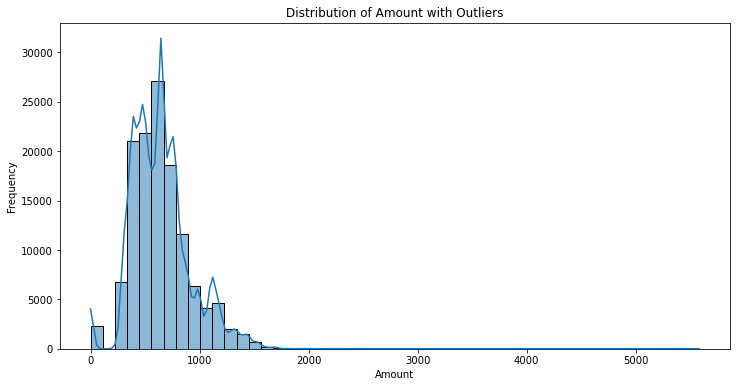

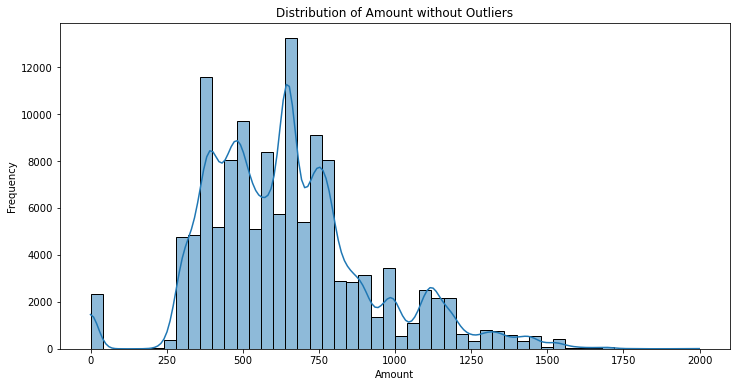

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution with outliers
plt.figure(figsize=(12, 6))
sns.histplot(sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount with Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Assuming outliers are those greater than 2000 (example threshold)
filtered_sales = sales[sales['Amount'] <= 2000]


# Plot distribution without outliers
plt.figure(figsize=(12, 6))
sns.histplot(filtered_sales['Amount'], kde=True, bins=50)
plt.title('Distribution of Amount without Outliers')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

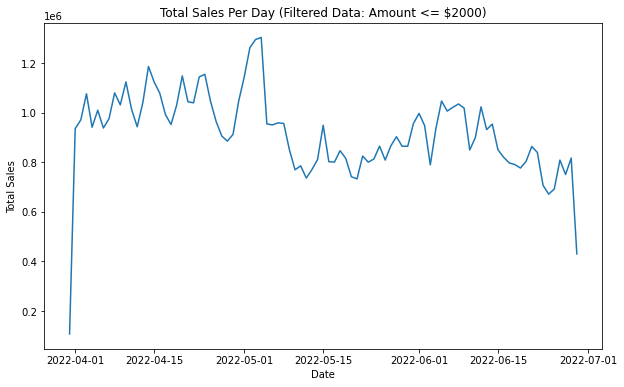

In [11]:
# Filter the data
filtered_sales = sales[sales['Amount'] <= 2000]

sales['Date'] = pd.to_datetime(sales['Date'])  # Convert 'Date' to datetime format
daily_sales = sales.groupby('Date')['Amount'].sum().reset_index()


# Group by date and sum the sales
daily_sales_filtered = filtered_sales.groupby('Date')['Amount'].sum()


# Plot the filtered data
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_filtered.index, daily_sales_filtered.values)
plt.title('Total Sales Per Day (Filtered Data: Amount <= $2000)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot the total sales per day
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title('Total Sales Per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Filter out sales data for March
sales_filtered = sales[~sales['Date'].dt.month.isin([3])]

# Group by month and sum the sales
monthly_sales_filtered = sales_filtered.groupby(sales_filtered['Date'].dt.to_period('M'))['Amount'].sum()

# Plot monthly sales excluding March
plt.figure(figsize=(12, 6))
monthly_sales_filtered.plot(kind='bar')
plt.title('Total Sales Per Month (Excluding March)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()